In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
#Ссылка на датасет https://www.kaggle.com/datasets/moazeldsokyx/dogs-vs-cats

In [4]:
# Создание и нормализация обучающей, тестовой и выборки валидации

batch_size = 256

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((256, 256)),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_path = "C:/Users/das-s/Downloads/DogsCats/dataset/train"
train_ds = datasets.ImageFolder(root=train_path, transform=transform)
train_dataloader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, pin_memory=True)

test_path = "C:/Users/das-s/Downloads/DogsCats/dataset/test"
test_ds = datasets.ImageFolder(root=test_path, transform=transform)
test_dataloader = DataLoader(test_ds, batch_size=batch_size, shuffle=True, pin_memory=True)

validation_path = "C:/Users/das-s/Downloads/DogsCats/dataset/validation"
validation_ds = datasets.ImageFolder(root=validation_path, transform=transform)
validation_dataloader = DataLoader(validation_ds, batch_size=batch_size, shuffle=True, pin_memory=True)

In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

c:\Users\das-s\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Feature batch shape: torch.Size([256, 3, 256, 256])
Labels batch shape: torch.Size([256])


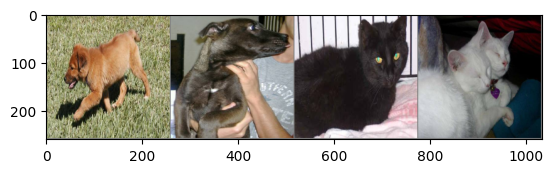

dogs	 dogs	 cats	 cats	


In [6]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
images = []
for i in range(4):
    images.append(train_features[i])
imshow(torchvision.utils.make_grid(images)) # show images
print(' '.join(f'{train_ds.classes[train_labels[j]]}\t' for j in range(4))) # print labels


In [7]:
class CNN(nn.Module):
    def __init__(self, channel, num_classes):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(channel, 16, kernel_size=3),
                                    nn.BatchNorm2d(16),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size=3),
                                    nn.BatchNorm2d(32),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=3),
                                    nn.BatchNorm2d(64),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(nn.Conv2d(64, 128, kernel_size=3),
                                    nn.BatchNorm2d(128),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(nn.Conv2d(128, 256, kernel_size=3),
                                    nn.BatchNorm2d(256),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer6 = nn.Sequential(nn.Conv2d(256, 512, kernel_size=3),
                                    nn.BatchNorm2d(512),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc1 = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(512*2*2, 1024),
            nn.ReLU())
        self.fc2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return nn.functional.softmax(x, dim=1)

In [8]:
model = CNN(3, len(test_ds.classes))
model.to(device)

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [9]:
for i, l in test_dataloader:
    print(model(i.to(device)).shape)
    break

torch.Size([256, 2])


In [10]:
def train(model, train_dataloader, optimizer, loss_func):
    losses = []
    model.train()
    print('Train')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for data, labels in tqdm(train_dataloader):
        counter += 1
        data = data.to(device)
        labels = labels.to(device)

        outputs = model(data)
        # calculate the loss
        loss = loss_func(outputs, labels)
        train_running_loss += loss.item()
        losses.append(loss.item())
        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    # loss and accuracy for the complete epoch
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(train_dataloader.dataset))
    return epoch_loss, epoch_acc, losses

In [11]:
def validate(model, validation_dataloader, loss_func):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    with torch.no_grad():
        for data, labels in tqdm(validation_dataloader):
            counter += 1
            data = data.to(device)
            labels = labels.to(device)
            # forward pass
            outputs = model(data)
            # calculate the loss
            loss = loss_func(outputs, labels)
            valid_running_loss += loss.item()
            # calculate the accuracy
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()
        
    # loss and accuracy for the complete epoch
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(validation_dataloader.dataset))
    return epoch_loss, epoch_acc

In [12]:
optimizer = Adam(params=model.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss()
num_epochs = 20

In [13]:
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
all_t_losses = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1} of {num_epochs}")
    train_epoch_loss, train_epoch_acc, all_t_epoch_losses = train(model, train_dataloader, 
                                              optimizer, loss_func)
    valid_epoch_loss, valid_epoch_acc = validate(model, validation_dataloader,  
                                                 loss_func)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    all_t_losses.append(all_t_epoch_losses)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)

Epoch 1 of 20
Train


100%|██████████| 79/79 [00:39<00:00,  2.03it/s]


Validation


100%|██████████| 20/20 [00:10<00:00,  1.97it/s]


Training loss: 0.728, training acc: 57.680
Validation loss: 0.735, validation acc: 57.280
--------------------------------------------------
Epoch 2 of 20
Train


100%|██████████| 79/79 [00:39<00:00,  2.02it/s]


Validation


100%|██████████| 20/20 [00:10<00:00,  1.99it/s]


Training loss: 0.615, training acc: 68.545
Validation loss: 0.625, validation acc: 67.560
--------------------------------------------------
Epoch 3 of 20
Train


100%|██████████| 79/79 [00:37<00:00,  2.09it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.01it/s]


Training loss: 0.563, training acc: 74.270
Validation loss: 0.636, validation acc: 66.900
--------------------------------------------------
Epoch 4 of 20
Train


100%|██████████| 79/79 [00:37<00:00,  2.12it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


Training loss: 0.541, training acc: 76.365
Validation loss: 0.560, validation acc: 74.320
--------------------------------------------------
Epoch 5 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.15it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Training loss: 0.509, training acc: 79.450
Validation loss: 0.610, validation acc: 69.240
--------------------------------------------------
Epoch 6 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.15it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Training loss: 0.483, training acc: 82.310
Validation loss: 0.565, validation acc: 73.500
--------------------------------------------------
Epoch 7 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.15it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Training loss: 0.463, training acc: 84.485
Validation loss: 0.546, validation acc: 75.620
--------------------------------------------------
Epoch 8 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.15it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Training loss: 0.458, training acc: 84.995
Validation loss: 0.462, validation acc: 84.920
--------------------------------------------------
Epoch 9 of 20
Train


100%|██████████| 79/79 [00:37<00:00,  2.12it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Training loss: 0.442, training acc: 86.665
Validation loss: 0.461, validation acc: 84.720
--------------------------------------------------
Epoch 10 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.15it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Training loss: 0.429, training acc: 87.985
Validation loss: 0.602, validation acc: 70.400
--------------------------------------------------
Epoch 11 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.15it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Training loss: 0.421, training acc: 88.840
Validation loss: 0.444, validation acc: 86.360
--------------------------------------------------
Epoch 12 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.16it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Training loss: 0.410, training acc: 89.880
Validation loss: 0.439, validation acc: 87.100
--------------------------------------------------
Epoch 13 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.16it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Training loss: 0.401, training acc: 90.900
Validation loss: 0.424, validation acc: 88.500
--------------------------------------------------
Epoch 14 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.16it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Training loss: 0.398, training acc: 91.075
Validation loss: 0.462, validation acc: 84.800
--------------------------------------------------
Epoch 15 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.16it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Training loss: 0.395, training acc: 91.550
Validation loss: 0.520, validation acc: 78.380
--------------------------------------------------
Epoch 16 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.16it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Training loss: 0.383, training acc: 92.715
Validation loss: 0.438, validation acc: 86.980
--------------------------------------------------
Epoch 17 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.15it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Training loss: 0.383, training acc: 92.855
Validation loss: 0.397, validation acc: 91.200
--------------------------------------------------
Epoch 18 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.16it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Training loss: 0.384, training acc: 92.540
Validation loss: 0.400, validation acc: 90.940
--------------------------------------------------
Epoch 19 of 20
Train


100%|██████████| 79/79 [00:36<00:00,  2.16it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Training loss: 0.367, training acc: 94.510
Validation loss: 0.390, validation acc: 91.840
--------------------------------------------------
Epoch 20 of 20
Train


100%|██████████| 79/79 [00:37<00:00,  2.13it/s]


Validation


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]

Training loss: 0.365, training acc: 94.665
Validation loss: 0.408, validation acc: 90.200
--------------------------------------------------


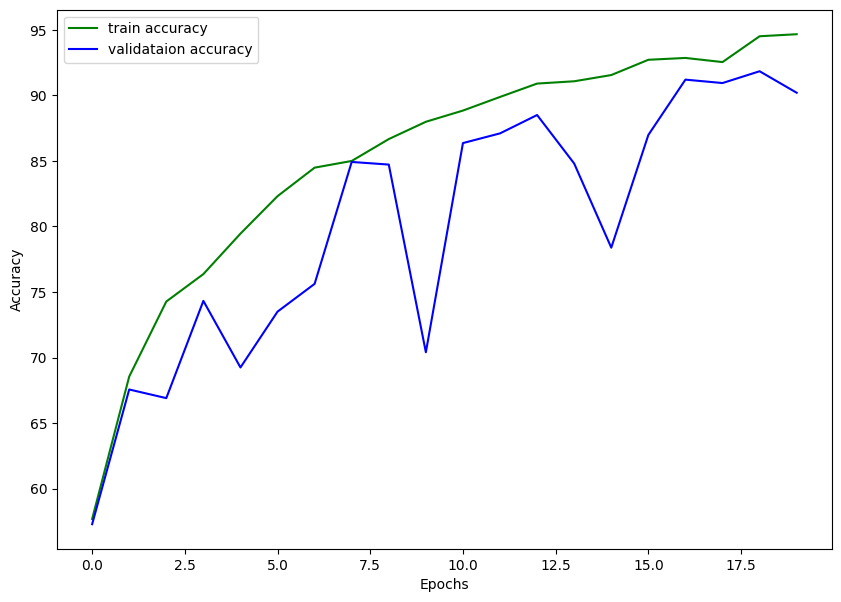

In [14]:
# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_acc, color='green', linestyle='-', 
    label='train accuracy'
)
plt.plot(
    valid_acc, color='blue', linestyle='-', 
    label='validataion accuracy'
)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

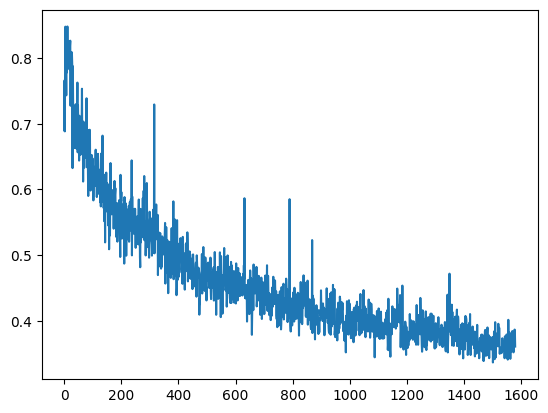

In [15]:
losses = np.array(all_t_losses)
losses =  losses.reshape(len(all_t_losses) * len(all_t_losses[0]))
plt.plot(losses)

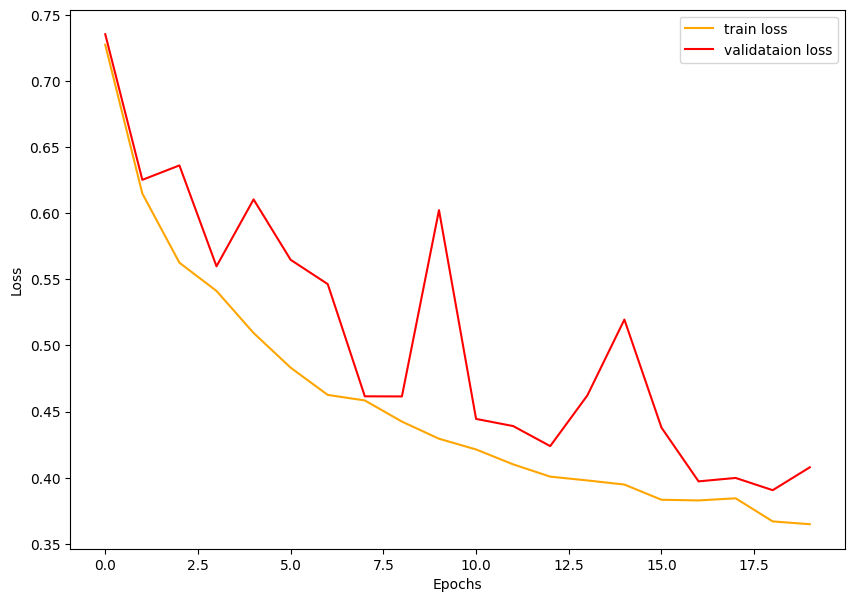

In [16]:
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_loss, color='orange', linestyle='-', 
    label='train loss')
plt.plot(
    valid_loss, color='red', linestyle='-', 
    label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

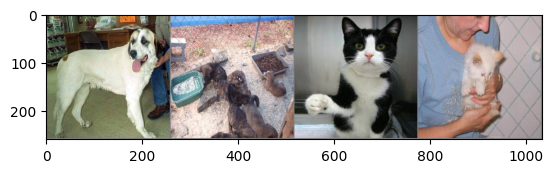

Real value:
dogs	 dogs	 cats	 cats	
Predicted value:
dogs	 dogs	 cats	 cats	


In [20]:
test_fetures, test_labels = next(iter(test_dataloader))
images = []
for i in range(4):
    images.append(test_fetures[i])
imshow(torchvision.utils.make_grid(images)) # show images
print("Real value:")
print(' '.join(f'{train_ds.classes[test_labels[j]]}\t' for j in range(4))) # print labels
print("Predicted value:")
print(' '.join(f'{train_ds.classes[model(test_fetures[j].view(1, 3, 256, 256).to(device)).argmax()]}\t' for j in range(4)))

In [21]:
real_labels = []
predicted_labels = []
for data, labels in test_dataloader:
    data = data.to(device)
    output = model(data).argmax(dim=1).cpu().detach().numpy()
    for i in range(len(output)):
        predicted_labels.append(output[i])
        real_labels.append(labels[i].detach().item())

In [22]:
from sklearn.metrics import classification_report

print(classification_report(predicted_labels, real_labels, target_names=test_ds.classes))

              precision    recall  f1-score   support

        cats       0.93      0.89      0.91      6531
        dogs       0.88      0.92      0.90      5930

    accuracy                           0.90     12461
   macro avg       0.90      0.91      0.90     12461
weighted avg       0.91      0.90      0.90     12461

